In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


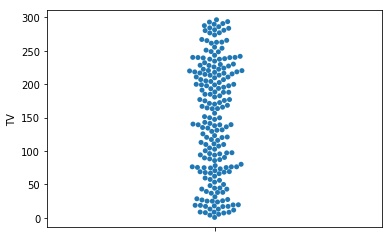

In [3]:
sns.swarmplot(y=df['TV'])

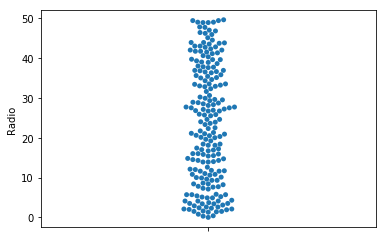

In [4]:
sns.swarmplot(y=df['Radio'])

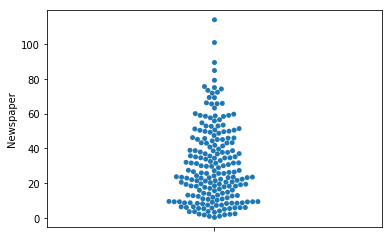

In [5]:
sns.swarmplot(y=df['Newspaper'])

In [6]:
df['Newspaper'].max()

114.0

In [7]:
df = df[df['Newspaper'] < 100]

In [8]:
df['Newspaper'].max()

89.4

In [9]:
reg = linear_model.LinearRegression()

In [10]:
x=df[['TV', 'Radio', 'Newspaper']]

In [11]:
y=df['Sales']

In [12]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
predicted = reg.predict(x).ravel()
actual = df['Sales']

In [14]:
residual = actual - predicted

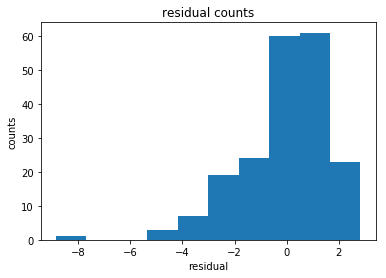

In [15]:
plt.hist(residual)
plt.title('residual counts')
plt.xlabel('residual')
plt.ylabel('counts')
plt.show()

In [18]:
x = preprocessing.normalize(x)

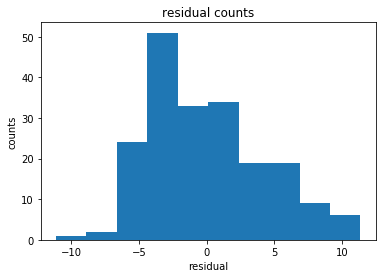

In [19]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

predicted = reg.predict(x).ravel()
actual = df['Sales']

residual = actual - predicted

plt.hist(residual)
plt.title('residual counts')
plt.xlabel('residual')
plt.ylabel('counts')
plt.show()

**It looks more like normal distribution now.**

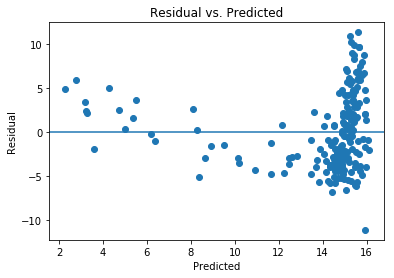

In [20]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()